In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
def laplacian_g(x, y, sigma):
    x2 = x**2
    y2 = y**2
    sigma4 = sigma**4
    sigma2 = sigma**2

    return -1*(1/(np.pi*sigma4))*(1-((x2+y2)/(2*sigma2)))*np.exp(-1*(x2+y2)/(2*sigma2))

In [3]:
def filterImg(img, fil):
    fil = fil.astype('float')    
    img = img.astype('float')
    # this holds the end result
    filtered = np.zeros_like(img)
    width = int((fil.shape[1]-1)/2)
    height = int((fil.shape[0]-1)/2)
    # do the filtering
    for i in range(height,img.shape[1]-height):
        for j in range(width,img.shape[0]-width):
            filtered[j,i]= np.sum(fil * img[j-width:j+width+1, i-height:i+height+1])
    return filtered

In [4]:
def LoG(sigma=1.0, size=19):
    aran = np.arange(-1 * (size // 2), size // 2 + 1)
    XX, YY = np.meshgrid(aran, aran)
    kernel = laplacian_g(XX, YY, sigma)
    kernel = kernel/np.sum(kernel) # normalization
    return kernel

In [5]:
for i in range(1,11):
    lap_g = LoG(i, 19)
    print(lap_g)

[[-4.00218177e-28 -1.75798822e-24 -2.84510636e-21 -1.70020195e-18
  -3.76231938e-16 -3.09364940e-14 -9.48988277e-13 -1.09041665e-11
  -4.71027312e-11 -7.66885339e-11 -4.71027312e-11 -1.09041665e-11
  -9.48988277e-13 -3.09364940e-14 -3.76231938e-16 -1.70020195e-18
  -2.84510636e-21 -1.75798822e-24 -4.00218177e-28]
 [-1.75798822e-24 -7.61296029e-21 -1.21259176e-17 -7.12085007e-15
  -1.54683742e-12 -1.24837536e-10 -3.76304681e-09 -4.26148939e-08
  -1.82305491e-07 -2.95799973e-07 -1.82305491e-07 -4.26148939e-08
  -3.76304681e-09 -1.24837536e-10 -1.54683742e-12 -7.12085007e-15
  -1.21259176e-17 -7.61296029e-21 -1.75798822e-24]
 [-2.84510636e-21 -1.21259176e-17 -1.89614472e-14 -1.09041665e-11
  -2.31454979e-09 -1.82305491e-07 -5.36633664e-06 -5.95382776e-05
  -2.51136045e-04 -4.05427228e-04 -2.51136045e-04 -5.95382776e-05
  -5.36633664e-06 -1.82305491e-07 -2.31454979e-09 -1.09041665e-11
  -1.89614472e-14 -1.21259176e-17 -2.84510636e-21]
 [-1.70020195e-18 -7.12085007e-15 -1.09041665e-11 -6.11

In [6]:
def trackScale(img, sigmas, size, threshold):
    filters = []

    height, width = img.shape[:2]
    
    for s in sigmas:
        filters.append(LoG(s, size))

    images = np.zeros((len(filters), height, width))

    for idx ,f in enumerate(filters):
        images[idx,:,:] = filterImg(img, f)
    
    filMaxScale = np.zeros_like(img)
    maximum_scale = np.zeros_like(img)

    coord = []

    # for h in range(1,height):
    #     for w in range(1,width):
    #         filMaxScale[h,w] = np.max(images[:,h,w])
    #         maximum_scale[h,w] = sigmas[np.argmax(images[:,h,w])]
    #         local_window = images[:, h-1:h+2, w-1:w+2]
    #         maxima = np.amax(local_window)
    #         if maxima >= threshold:
    #             scale, x, y  = np.unravel_index(local_window.argmax(), local_window.shape)
    #             coord.append((h+x-1, w+y-1, sigmas[scale]))


    for h in range(height):
        for w in range(width):
            filMaxScale[h,w] = np.max(images[:,h,w])
            maximum_scale[h,w] = sigmas[np.argmax(images[:,h,w])]

    
    print('='*20,"Calculating Local Maxima",'='*20)

    for h in range(1,height):
        for w in range(1,width):
            local_window = filMaxScale[h-1:h+2, w-1:w+2]
            maxima = np.amax(local_window)
            if maxima >= threshold:
                x, y  = np.unravel_index(local_window.argmax(), local_window.shape)
                coord.append((h+x-1, w+y-1, maximum_scale[h+x-1, w+y-1]))


    coord = list(set(coord))
    
    print('='*20,"Plotting",'='*20)
    
    fig, ax = plt.subplots()

    ax.imshow(img,cmap="gray")
    
    for blob in coord:
        y,x,r = blob
        c = plt.Circle((x, y), r*np.sqrt(2), color='red', linewidth=0.05, fill=False)
        ax.add_patch(c)
    ax.plot()  
    plt.show()

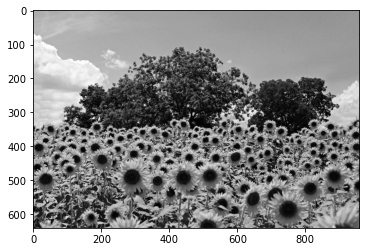

In [7]:
img = plt.imread('image3.png')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
img = 0.2989 * R + 0.5870 * G + 0.1140 * B
img = img/255
plt.imshow(img, cmap='gray')
plt.show()

==================== Calculating Local Maxima ====================
==================== Plotting ====================


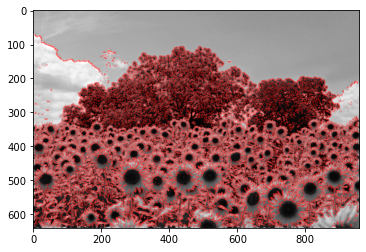

In [9]:
# It takes too much time, think it's the optimal parameters
trackScale(img, sigmas=list(range(1,50,5)), size=9, threshold=0.4)